<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%A3%D0%BB%D1%83%D1%87%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт необходимых библиотек**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

**1. Получите данные и загрузите их в рабочую среду.**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/RomanchenkoRS/ML/main/heart')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Убедились, что пропусков в данных нет.

**2. Подготовьте датасет к обучению моделей: категориальные переменные переведите в цифровые значения.**

Найдём категориальные переменные.

In [ ]:
categorials = data.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Имеем 5 категориальных переменных. Рассмотрим, сколько уникальных значений есть в этих переменных.

In [ ]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Применим метод one-hot encoding, т.к. это не даст большого количества перменных (14 новых).

In [ ]:
X = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Уберём целевую переменную из датасета
y = data["HeartDisease"]
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

Уберём целевую переменную из датасета, а также переменную "Sex_F", т.к. "Sex_M" является взаимнообратной перменной.

In [ ]:
X = X.drop(["HeartDisease", "Sex_F"], axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,1,0,0,1,0,0,1,0,1,0,0,0,1


На данном этапе не будем искать аномалии, будем обучать модель на исходных данных.

**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Обучите модель логистической регрессии с параметрами по умолчанию.**

In [ ]:
model = LogisticRegression()

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # кол-во итераций для обучения
    )

model.fit(X_train, y_train)
predictions = model.predict(X_test)

model.predict(X_test)  # получаем массив

train_score_lr_base = model.score(X_train, y_train)
test_score_lr_base = model.score(X_test, y_test)
print(f"score_train для логистической регрессии: {train_score_lr_base:.4f} ")
print(f"score_test для логистической регрессии: {test_score_lr_base:.4f} ")

score_train для логистической регрессии: 0.8733 
score_test для логистической регрессии: 0.8533 


**5.Подсчитайте основные метрики модели. Используйте следующие метрики и функцию: cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])**

In [ ]:
cv_results = cross_validate(model, X, y, cv=10,
                            scoring=['accuracy', 'recall', 'precision', 'f1'],
                            return_train_score=False)

Accuracy_base_model = cv_results['test_accuracy'].mean().round(4)
Recall_base_model = cv_results['test_recall'].mean().round(4)
Precision_base_model = cv_results['test_precision'].mean().round(4)
F1_base_model = cv_results['test_f1'].mean().round(4)


print(f"Accuracy mean: {Accuracy_base_model}")
print(f"Recall mean: {Recall_base_model}")
print(f"Precision mean: {Precision_base_model}")
print(f"F1 mean: {F1_base_model}")

Accuracy mean: 0.8506
Recall mean: 0.8696
Precision mean: 0.8672
F1 mean: 0.8639


In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Модель', 'Accuracy mean', 'Recall mean', 'Precision mean', 'F1 mean'])

In [ ]:
results.loc[len(results)] = ['Исходная модель', Accuracy_base_model, Recall_base_model, Precision_base_model, F1_base_model]

**6.Оптимизируйте 3-4 параметра модели:**

**a) Используйте GridSearchCV.**

In [ ]:
param_grid = {
    'logisticregression__solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__max_iter': [100, 150, 200, 500, 1000]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

# Обучение
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'logisticregression__C': 0.01, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'lbfgs'}


**b) Используйте RandomizedSearchCV.**

In [ ]:
param_distributions = {
    'logisticregression__solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
    'logisticregression__C': uniform(0.01, 10),
    'logisticregression__max_iter': [100, 150, 200, 500, 1000, 1500, 2000]
}

# Настраиваем RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=5, cv=5, scoring='accuracy', random_state=42)
# Обучение
random_search.fit(X_train, y_train)

print("Лучшие параметры :", random_search.best_params_)

Лучшие параметры : {'logisticregression__C': 3.7554011884736247, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'saga'}


**d) Повторите п. 5 после каждого итогового изменения параметров.**

In [ ]:
GridSearchCV = cross_validate(grid_search.best_estimator_, X, y, cv=10,
                            scoring=['accuracy', 'recall', 'precision', 'f1'],
                            return_train_score=False)


Accuracy_base_model_GS = GridSearchCV['test_accuracy'].mean().round(4)
Recall_base_model_GS = GridSearchCV['test_recall'].mean().round(4)
Precision_base_model_GS = GridSearchCV['test_precision'].mean().round(4)
F1_base_model_GS = GridSearchCV['test_f1'].mean().round(4)


print(f"Accuracy mean: {Accuracy_base_model_GS}")
print(f"Recall mean: {Recall_base_model_GS}")
print(f"Precision mean: {Precision_base_model_GS}")
print(f"F1 mean: {F1_base_model_GS}")

Accuracy mean: 0.8484
Recall mean: 0.8775
Precision mean: 0.8569
F1 mean: 0.8637


In [ ]:
results.loc[len(results)] = ['GridSearch', Accuracy_base_model_GS, Recall_base_model_GS, Precision_base_model_GS, F1_base_model_GS]

In [ ]:
RandomizedSearchCV = cross_validate(random_search.best_estimator_, X, y, cv=10,
                            scoring=['accuracy', 'recall', 'precision', 'f1'],
                            return_train_score=False)

Accuracy_base_model_RS = RandomizedSearchCV['test_accuracy'].mean().round(4)
Recall_base_model_RS = RandomizedSearchCV['test_recall'].mean().round(4)
Precision_base_model_RS = RandomizedSearchCV['test_precision'].mean().round(4)
F1_base_model_RS = RandomizedSearchCV['test_f1'].mean().round(4)

print(f"Accuracy mean: {Accuracy_base_model_RS}")
print(f"Recall mean: {Recall_base_model_RS}")
print(f"Precision mean: {Precision_base_model_RS}")
print(f"F1 mean: {F1_base_model_RS}")

Accuracy mean: 0.8495
Recall mean: 0.8676
Precision mean: 0.8671
F1 mean: 0.8629


In [ ]:
results.loc[len(results)] = ['RandomizedSearch', Accuracy_base_model_RS, Recall_base_model_RS, Precision_base_model_RS, F1_base_model_RS]

**Проведём анализ данных на выбросы и устраним их, чтобы оценить качество работы модели.**

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Можем заметить, что в данных есть некорректные значения. Например минимальное значение артетриального давления в покое равно 0, чего не может быть. Проверим данные на выбросы.

Посмотрим на гистограммы распределений всех данных в датасете.

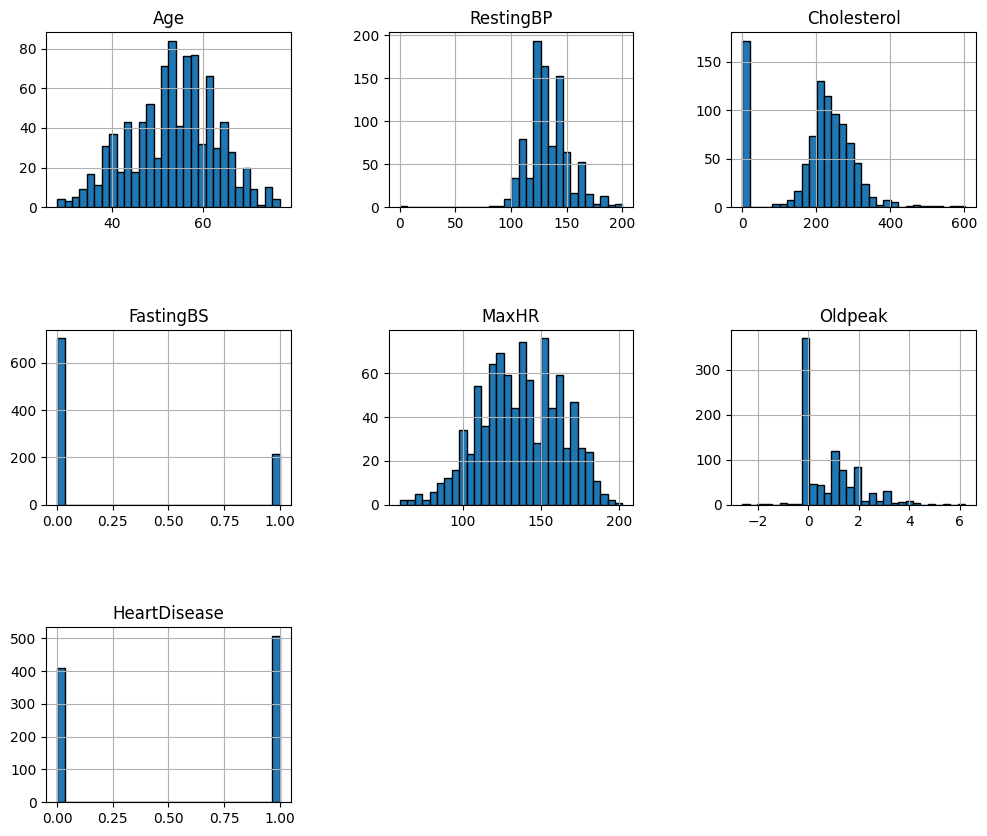

In [ ]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Можем заметить, что в данных присутствуют некоторые сомнительные моменты, но без достаточных медицинских знаний не будем такое утверждать. Рассмотрим распределение по переменной "RestingBP", т.к. заметили там подозрение на выброс. Также уберём все нулевые значения для переменной "Cholesterol", т.к. уровень холестерина оказывает влияние на здоровье сердца.

Также заметен дисбаланс в целевой переменной, что тоже может сказываться на результатах работы модели.

<Axes: xlabel='RestingBP'>

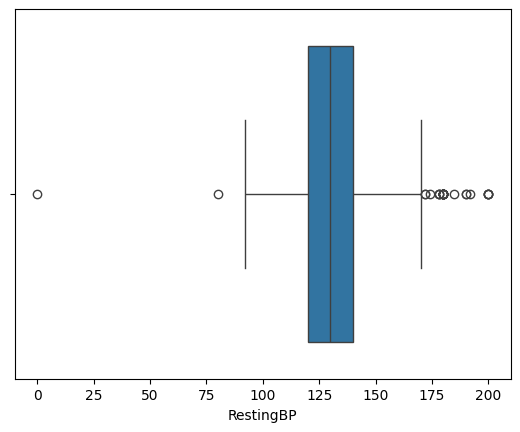

In [ ]:
sns.boxplot(x=data["RestingBP"])

In [ ]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Видим, что одна запись имеет значение, которого не может быть в реальном мире. Удалим эту строку из датасета.

In [ ]:
data_new = data.drop(index=[449])

Удалим все строки, у которых значения в переменной "Cholesterol" = 0

In [ ]:
data_new = data[data['Cholesterol'] != 0]
data_new = data_new.reset_index(drop=True)

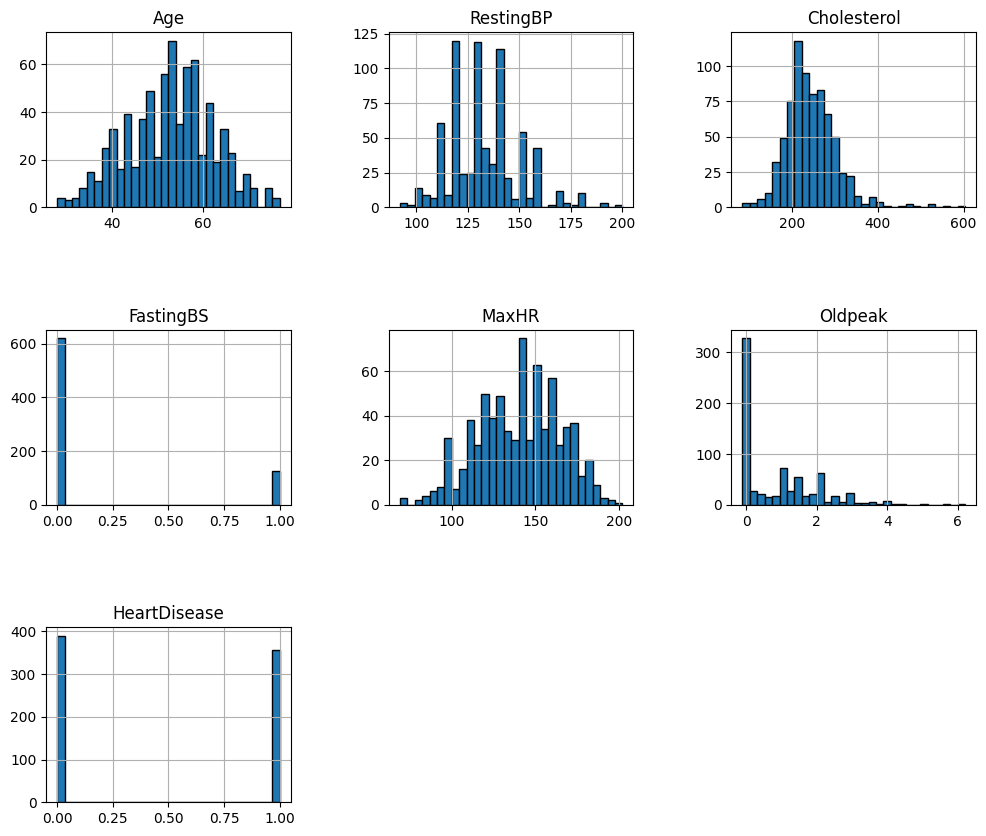

In [ ]:
data_new.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
d1 = data.shape
d2 = data_new.shape
d1, d2

((918, 12), (746, 12))

Можем заметить, что потеряли значительную часть данных, зато убрали неверные значения, что должно положительно сказаться на качестве работы модели.

Стоит заметить, что значения целевой переменной распределены практически равномерно.


Проверим точность новой модели.

In [ ]:
X_new = pd.get_dummies(data_new, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)
X_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
y_new = data_new["HeartDisease"]
y_new.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
X_new = X_new.drop(["HeartDisease", "Sex_F"], axis=1)
X_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
model_new = LogisticRegression()

model_new = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # кол-во итераций для обучения
    )

model_new.fit(X_new_train, y_new_train)
predictions_new = model_new.predict(X_new_test)

model_new.predict(X_new_test)  # получаем массив

train_score_lr_new = model_new.score(X_new_train, y_new_train)
test_score_lr_new = model_new.score(X_new_test, y_new_test)
print(f"score_train для логистической регрессии: {train_score_lr_new:.4f} ")
print(f"score_test для логистической регрессии: {test_score_lr_new:.4f} ")

score_train для логистической регрессии: 0.8607 
score_test для логистической регрессии: 0.8933 


Подсчитаем метрики.

In [ ]:
cv_results_new = cross_validate(model_new, X_new, y_new, cv=10,
                            scoring=['accuracy', 'recall', 'precision', 'f1'],
                            return_train_score=False)

Accuracy_new_model = cv_results_new['test_accuracy'].mean().round(4)
Recall_new_model = cv_results_new['test_recall'].mean().round(4)
Precision_new_model = cv_results_new['test_precision'].mean().round(4)
F1_new_model = cv_results_new['test_f1'].mean().round(4)

print(f"Accuracy mean: {Accuracy_new_model}")
print(f"Recall mean: {Recall_new_model}")
print(f"Precision mean: {Precision_new_model}")
print(f"F1 mean: {F1_new_model}")

Accuracy mean: 0.8603
Recall mean: 0.8613
Precision mean: 0.8517
F1 mean: 0.8536


In [ ]:
results.loc[len(results)] = ['Модель на обработанных данных', Accuracy_new_model, Recall_new_model, Precision_new_model, F1_new_model]

7**. Сформулируйте выводы по проделанной работе:**

**a) Сравните метрики построенных моделей.**

In [ ]:
results

,Модель,Accuracy mean,Recall mean,Precision mean,F1 mean
0,Исходная модель,0.8506,0.8696,0.8672,0.8639
1,GridSearch,0.8484,0.8775,0.8569,0.8637
2,RandomizedSearch,0.8495,0.8676,0.8671,0.8629
3,Модель на обработанных данных,0.8603,0.8613,0.8517,0.8536


Можем заметить, что у всех моделей достаточно высокие значения метрик. Наибольшее значение среднего Accuracy у модели с обработанными данными, однако значение среднего F1 у исходной модели.

Если оценивать F1 от базовой модели с применением методов GridSearch и RandomizedSearch видим незначительное ухудшение метрики.
